# Hellings-Downs curve


The [Hellings-Downs curve](https://iopscience.iop.org/article/10.3847/2041-8213/acdac6) is used for the detection of the stochastic GW background.

What does _our_ HD-equivalent curve look like using the state-space model and frequencies?


![stuff](https://astrobites.org/wp-content/uploads/2023/06/Picture-4.png)

---

### Setup

In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

### Define some useful functions 

In [110]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 



#Function to create synthetic data
def create_synthetic_data(h,process_noise,measurement_noise,seed,K=1):

    P    = SystemParameters(h=h,σp=process_noise,σm=measurement_noise,seed=seed,num_gw_sources=K)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return data.f_measured, PTA.q,PTA.Npsr





from scipy.stats import pearsonr

def pipeline(k,seed):

    h = None 
    measurement_noise = 0.0
    process_noise = 0.0


    f_measured,q,Npsr = create_synthetic_data(h,process_noise,measurement_noise,seed,K=k)

    outputs = np.zeros((len(indexes),2))
    print("Getting the correlations between ", len(indexes), " pairs")
    for i, (a,b) in enumerate(indexes):

        data_a = f_measured[:,a]
        data_b = f_measured[:,b]
        correlation = pearsonr(data_a, data_b).statistic 

        qa = q[a,:]
        qb = q[b,:]
        cos_angle = np.dot(qa,qb) / (np.linalg.norm(qa) * np.linalg.norm(qb))
        
        outputs[i,0] = np.arccos(cos_angle)
        outputs[i,1] = correlation


    #Sort it by angle
    x = outputs[:,0]
    y = outputs[:,1]

    idx = np.argsort(x)

    x_sorted = x[idx]
    y_sorted = y[idx]

    return x,y 




#Plot it
import matplotlib.pyplot as plt 
import scienceplots 





from scipy.stats import binned_statistic
def add_to_plot(x,y,k,plot_datapoints=True,savefig = False,plot_bins=True):


    plt.style.use('science')
    #Setup figure 
    h,w = 12,12
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)


    statistic,bin_edges,bin_number = binned_statistic(x, y,statistic='mean',bins = 15)
    statistic_sigma,bin_edges,bin_number = binned_statistic(x, y,statistic='std',bins = 15)

    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


    if plot_datapoints:
        ax.scatter(x,y,alpha=0.5,label = 'raw data')



    #ax.errorbar(bin_centers, statistic, yerr=statistic_sigma, fmt='o',label='binned data',c='r',s=100,marker = '^')


    if plot_bins:
        ax.errorbar(bin_centers, statistic, yerr = statistic_sigma, ls = "None", color = "r",capsize=5,elinewidth=2)
        ax.scatter(bin_centers,statistic,label='binned data',c='r',s=100,marker = '^')



    ax.axhline(0.0, c='0.5', linestyle = '--')



    #config
    fs = 20
    ax.set_xlabel('Angular separation between pulsars [rad]', fontsize=fs)
    ax.set_ylabel(r'Pearson correlation', fontsize=fs)
    ax.yaxis.set_tick_params(labelsize=fs-6)
    ax.xaxis.set_tick_params(labelsize=fs-6)

    ax.set_title(f'Number of GW sources = {k}', fontsize=fs)
    ax.set_ylim(-1,1)


    if savefig:
        saveid = f'{k:05d}'
        plt.savefig(f"../data/images/HD/{saveid}.png", bbox_inches="tight",dpi=300)


    plt.show()





# HD for 1 source 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 1 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


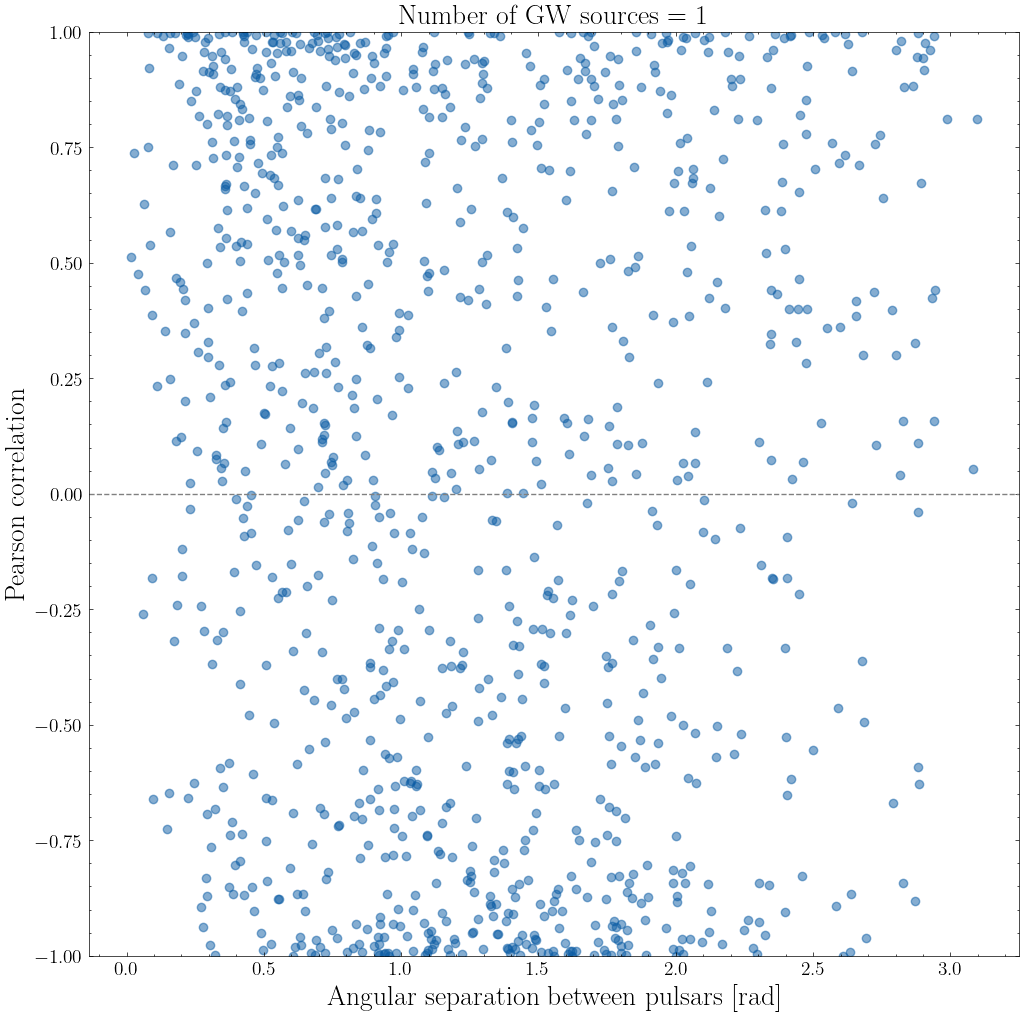

In [104]:
#Create data and add to figure 
k=1
x,y = pipeline(k,1238)
add_to_plot(x,y,k,plot_bins=False)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 1 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


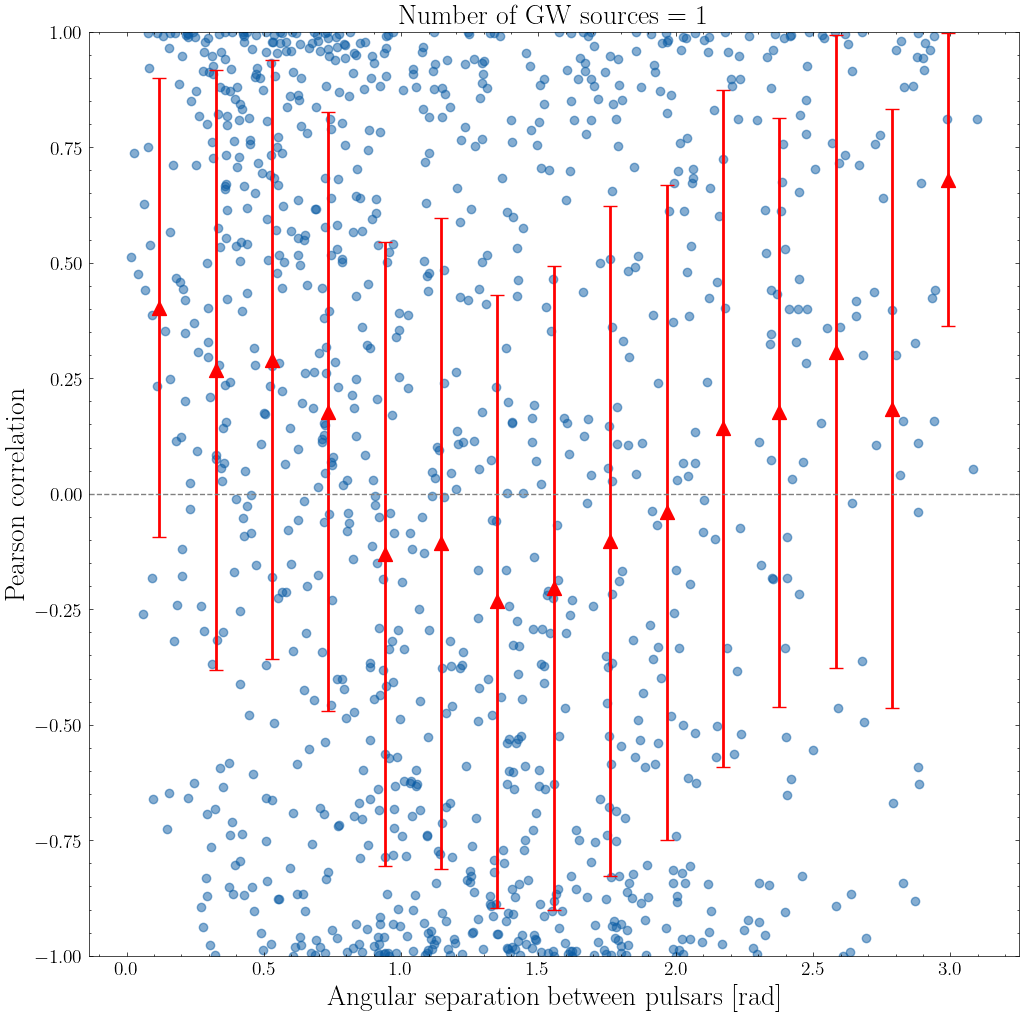

In [91]:
#Create data and add to figure 
k=1
x,y = pipeline(k,1238)
add_to_plot(x,y,k,plot_bins=True)

# HD for 10 sources 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are including the PSR terms in your synthetic data generation


Running with 10 GW sources 
Calculating the X factor
Getting the correlations between  1081  pairs


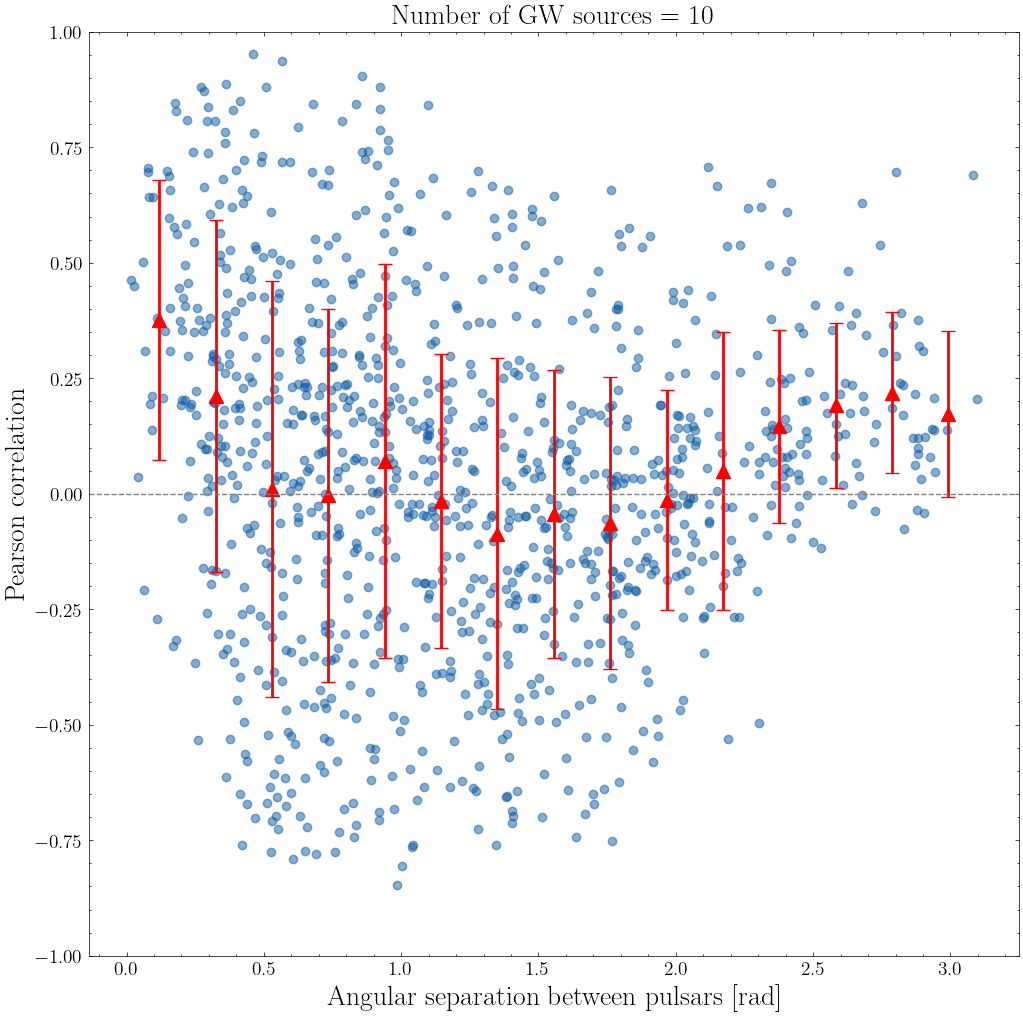

In [92]:
k=10
x,y = pipeline(k,1238)
add_to_plot(x,y,k,plot_bins=True)

# HD for 100 sources 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are including the PSR terms in your synthetic data generation


Running with 100 GW sources 
Calculating the X factor
Getting the correlations between  1081  pairs


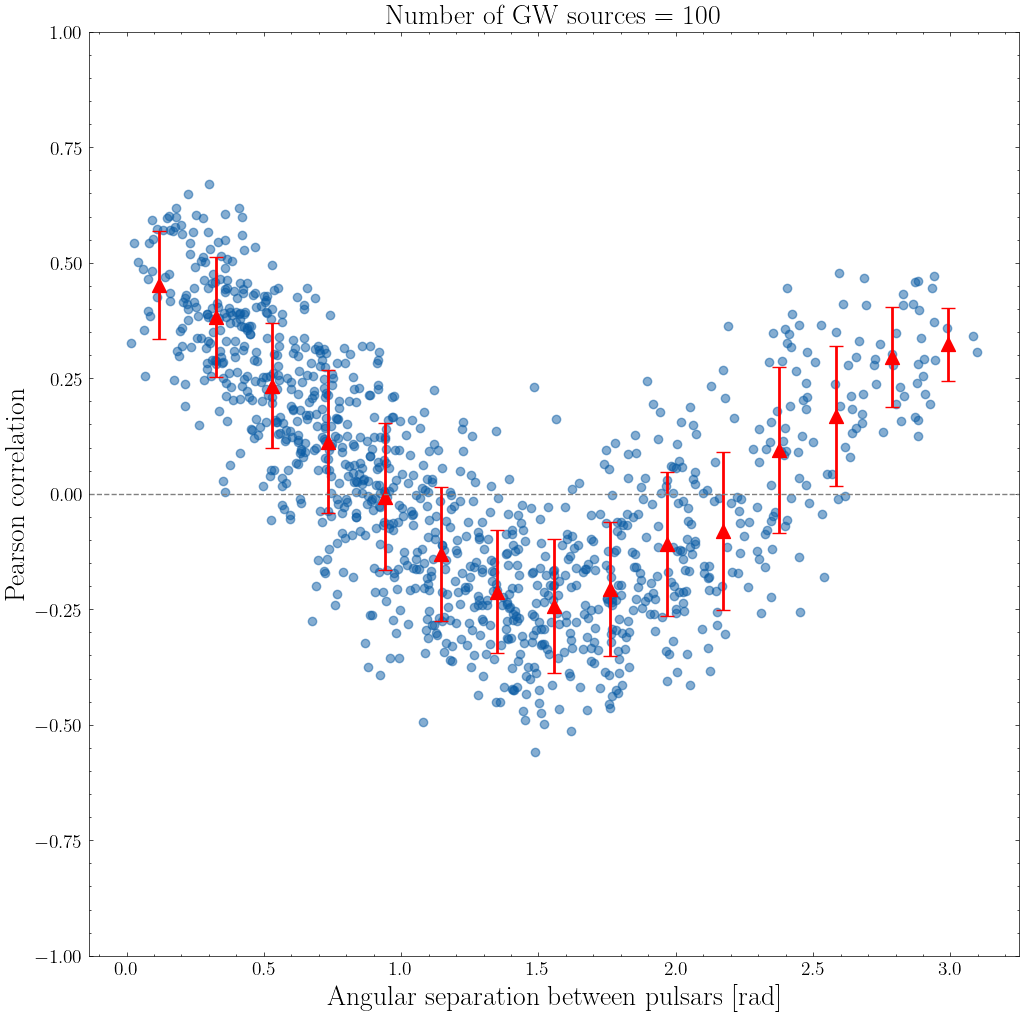

In [93]:
k=100
x,y = pipeline(k,1238)
add_to_plot(x,y,k,plot_bins=True)

# Iterate over multiples of K 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 1 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


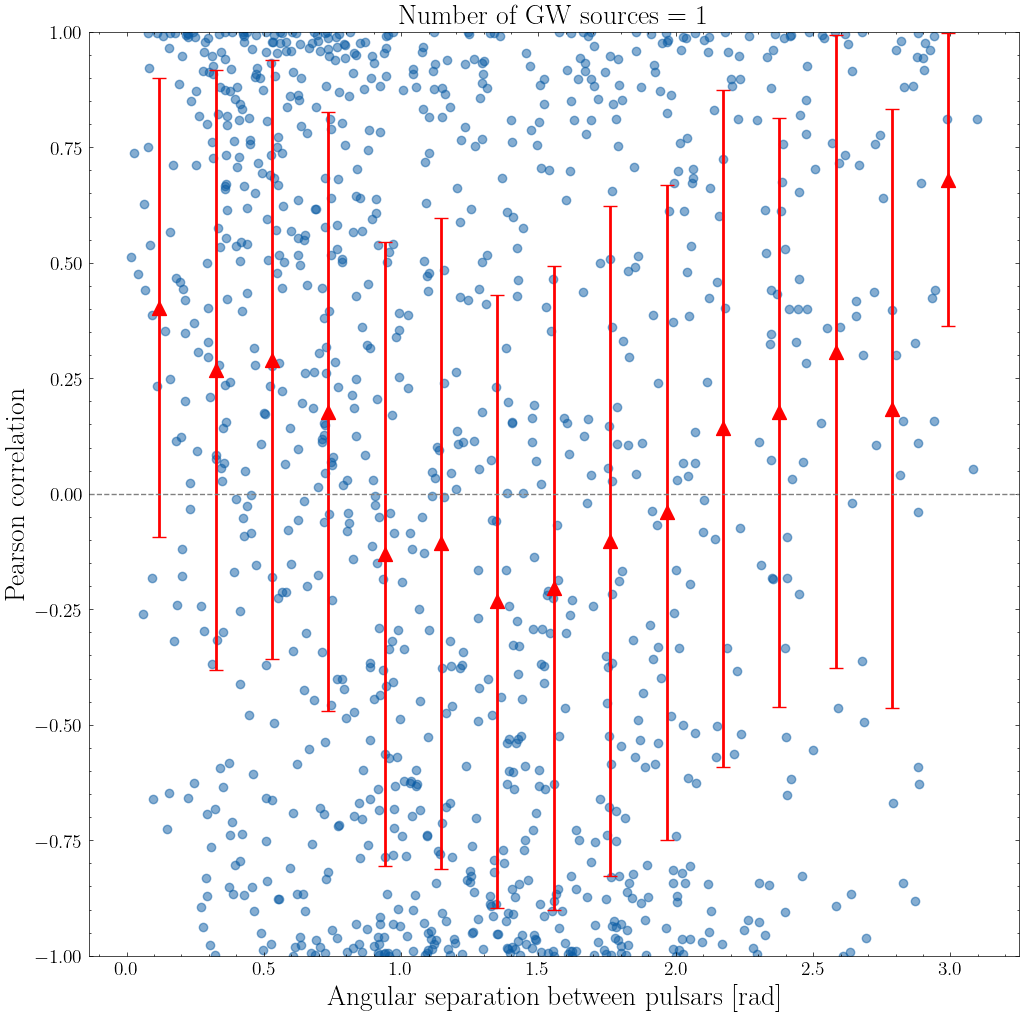

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 2 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


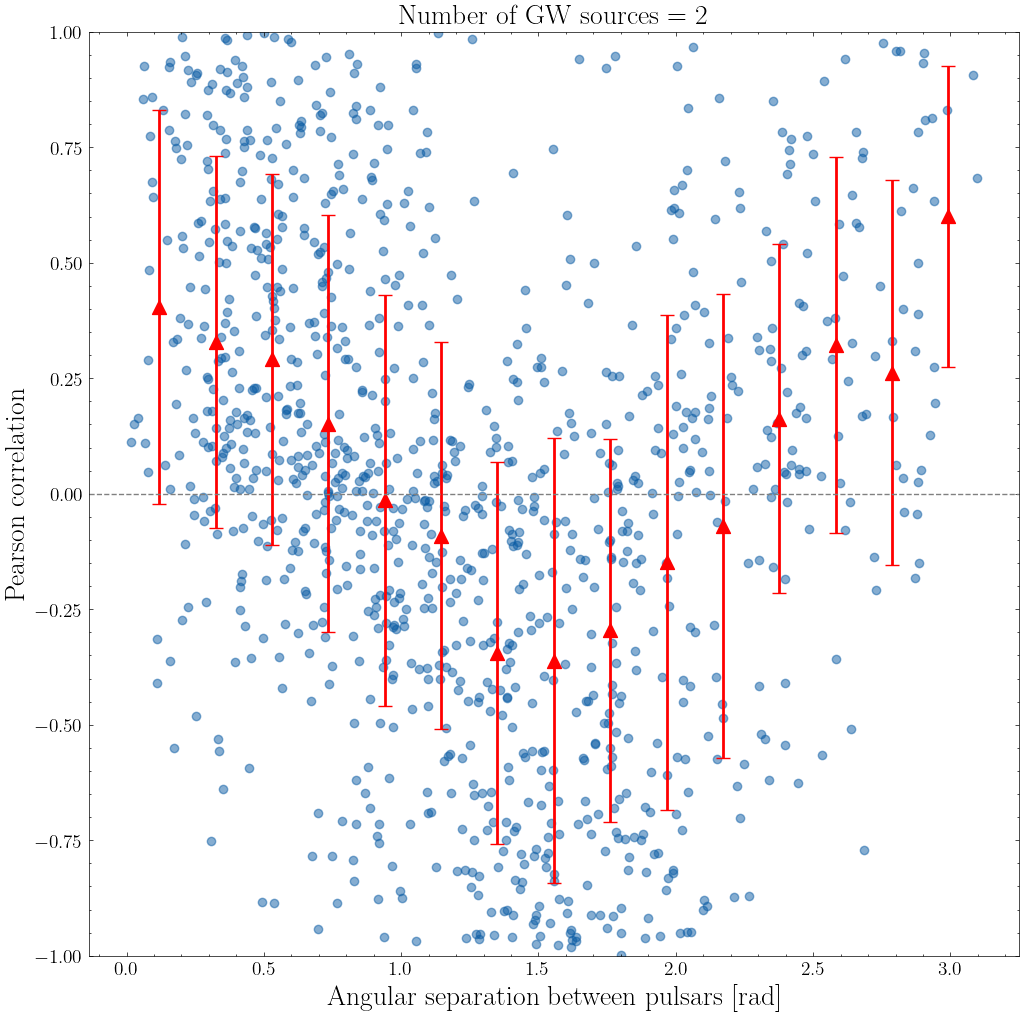

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are including the PSR terms in your synthetic data generation


Running with 6 GW sources 
Calculating the X factor
Getting the correlations between  1081  pairs


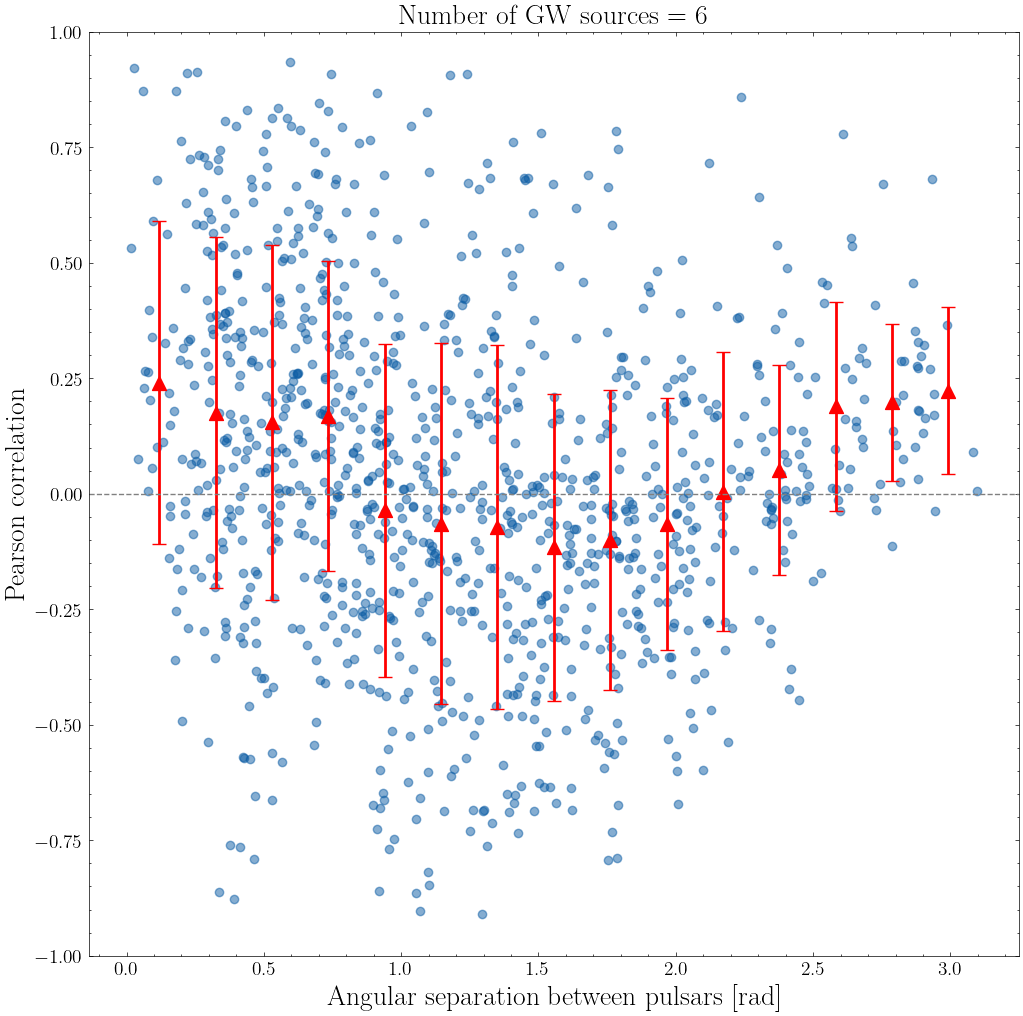

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 15 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


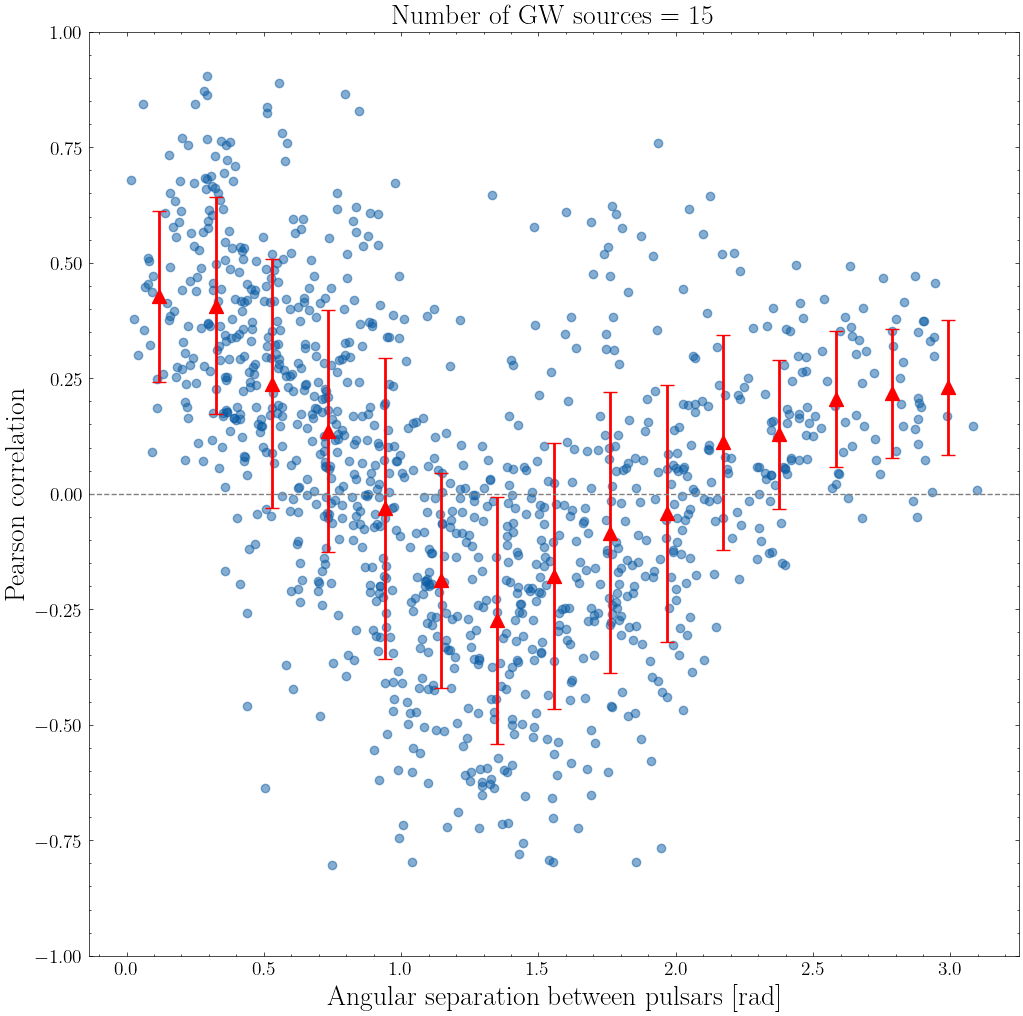

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are including the PSR terms in your synthetic data generation


Running with 39 GW sources 
Calculating the X factor
Getting the correlations between  1081  pairs


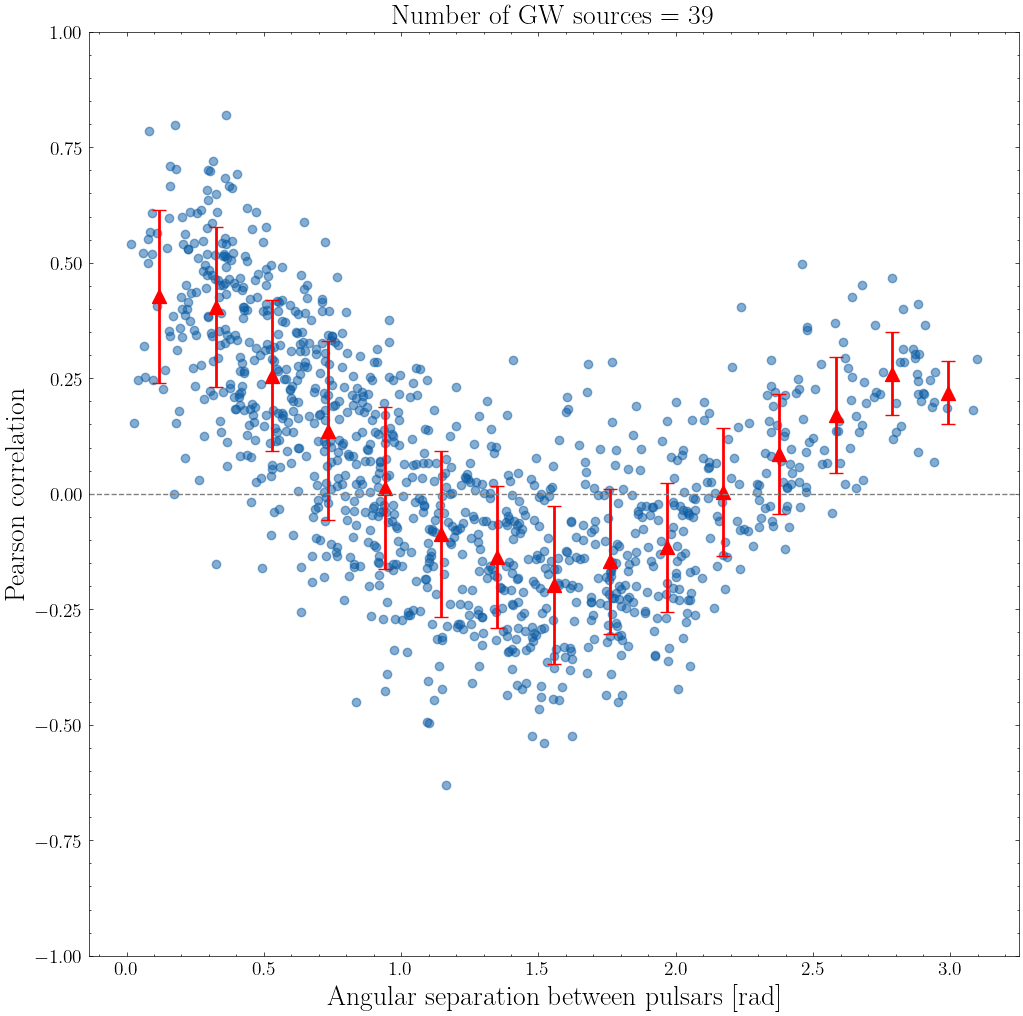

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are including the PSR terms in your synthetic data generation


Running with 100 GW sources 
Calculating the X factor
Getting the correlations between  1081  pairs


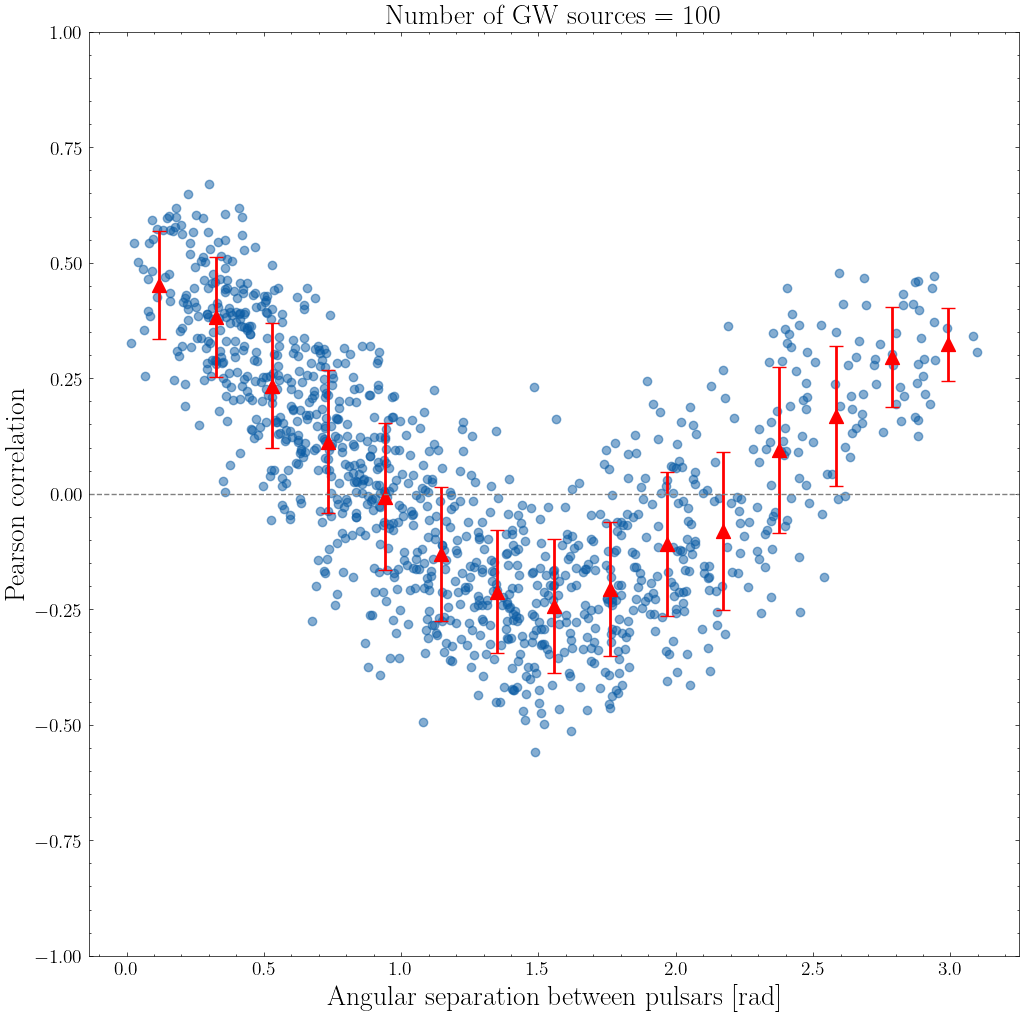

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:You are including the PSR terms in your synthetic data generation


Running with 251 GW sources 
Calculating the X factor
Getting the correlations between  1081  pairs


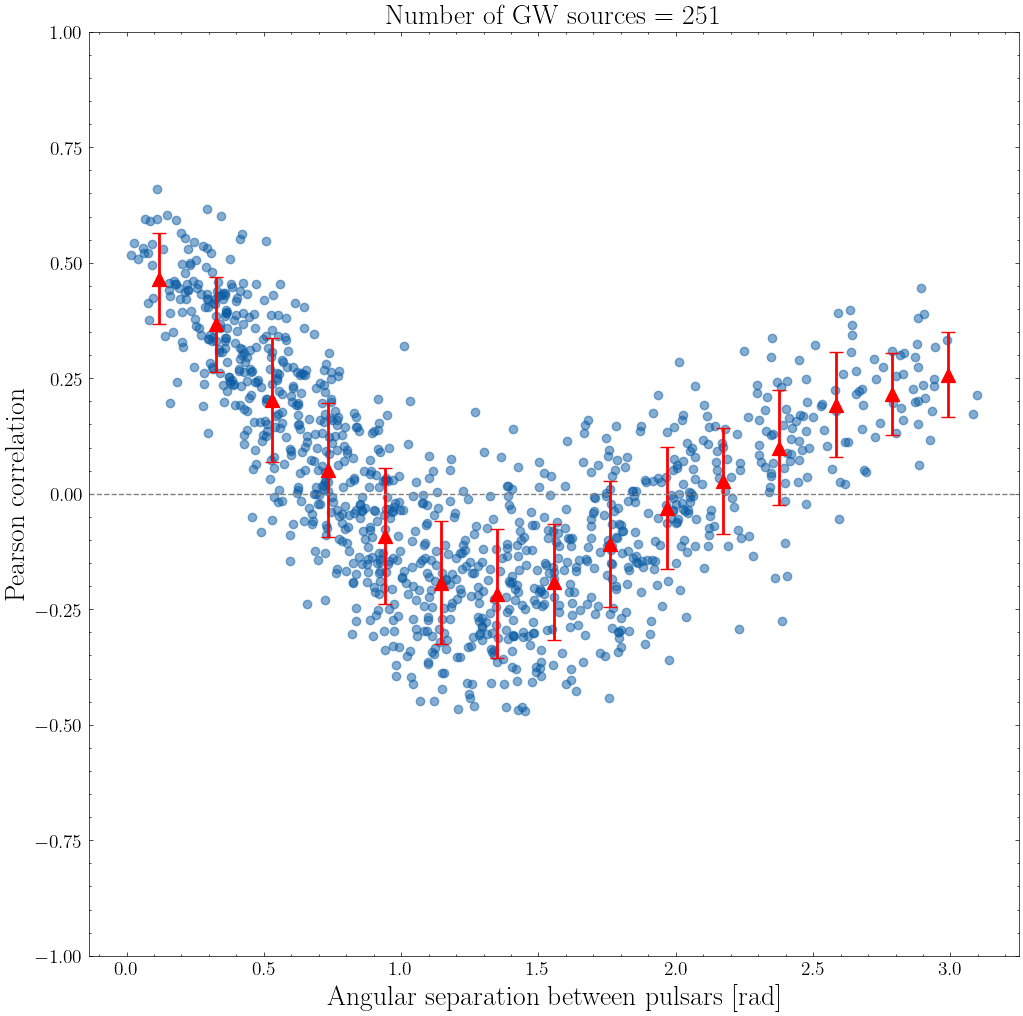

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 630 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


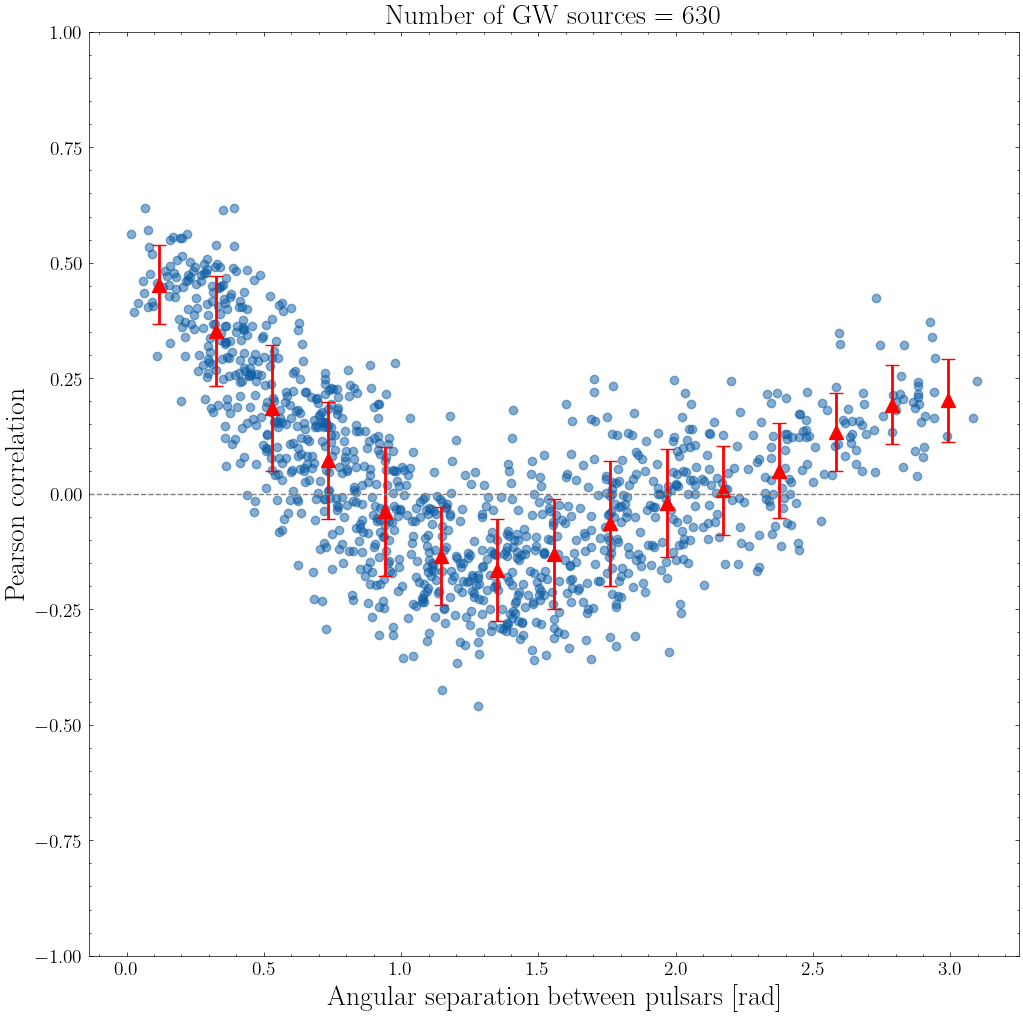

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 1584 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


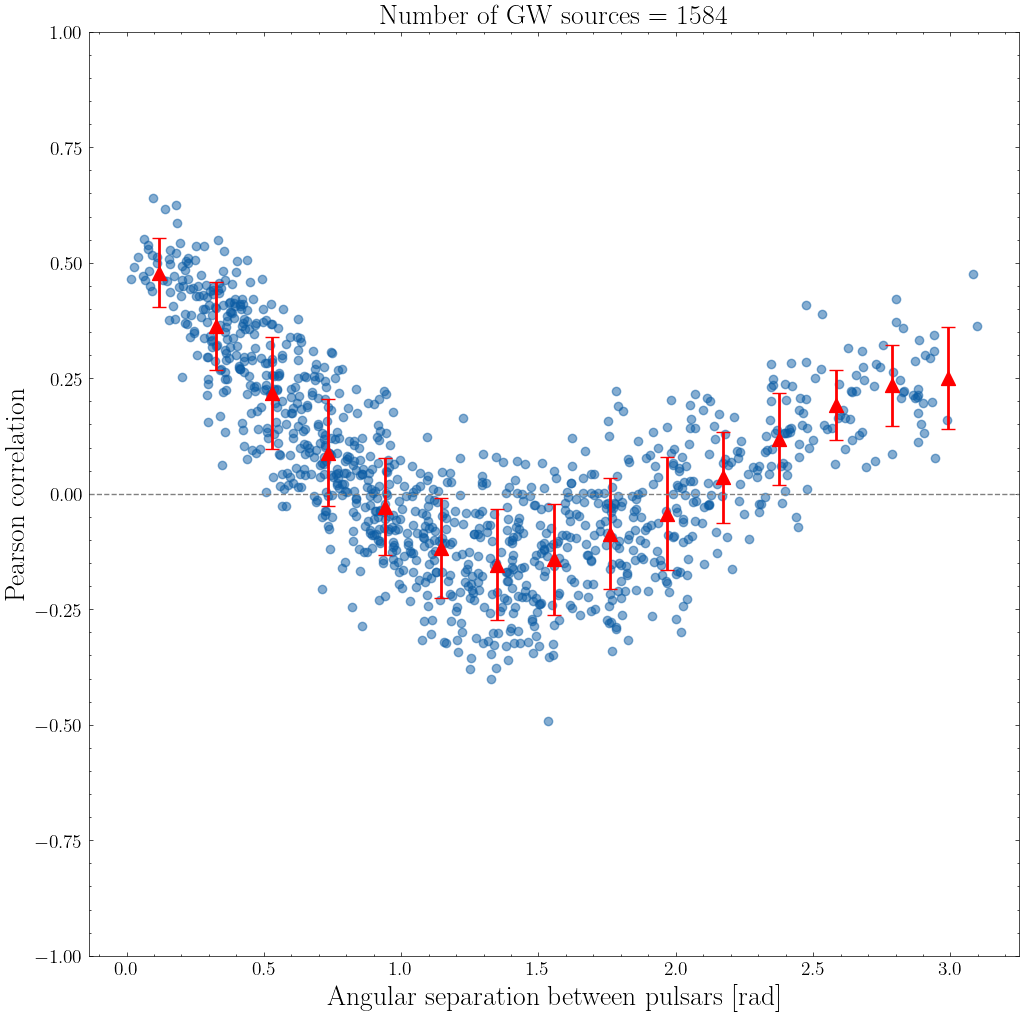

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 3981 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


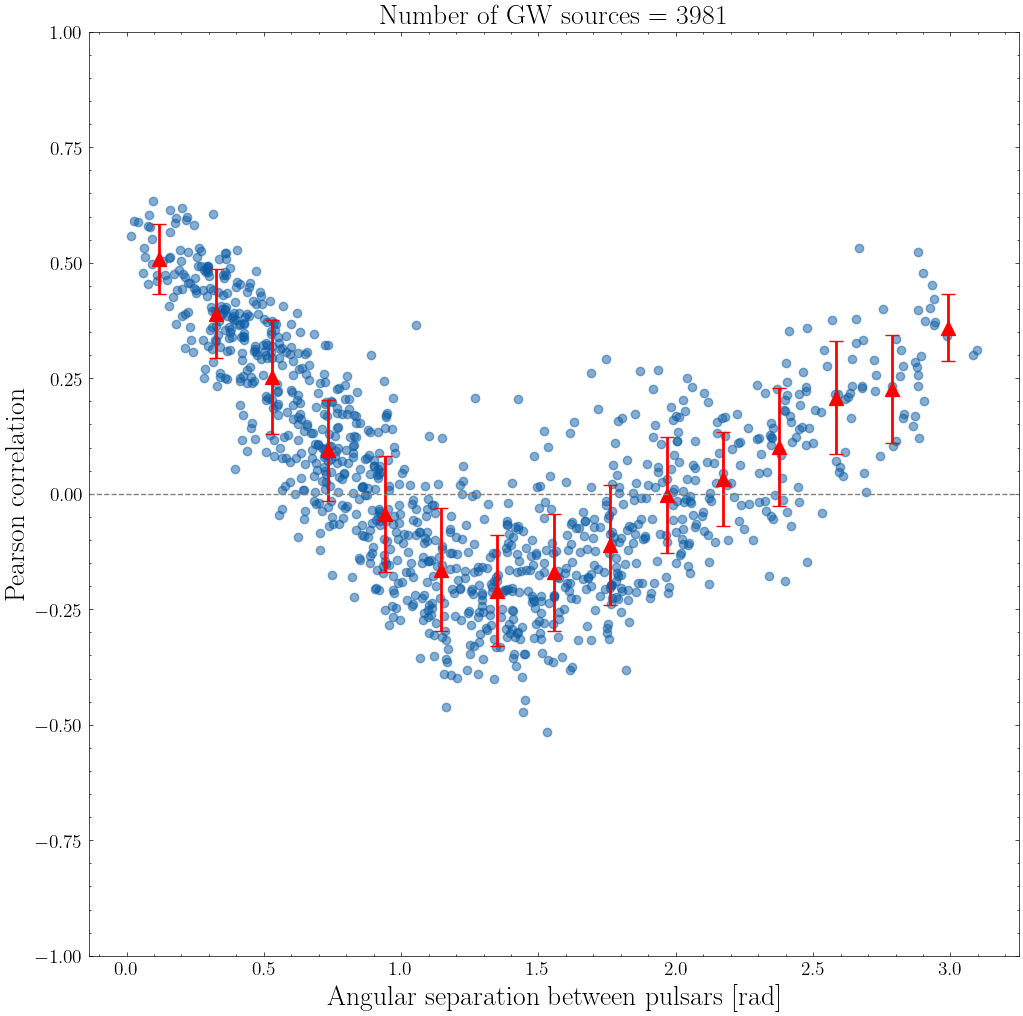

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 10000 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


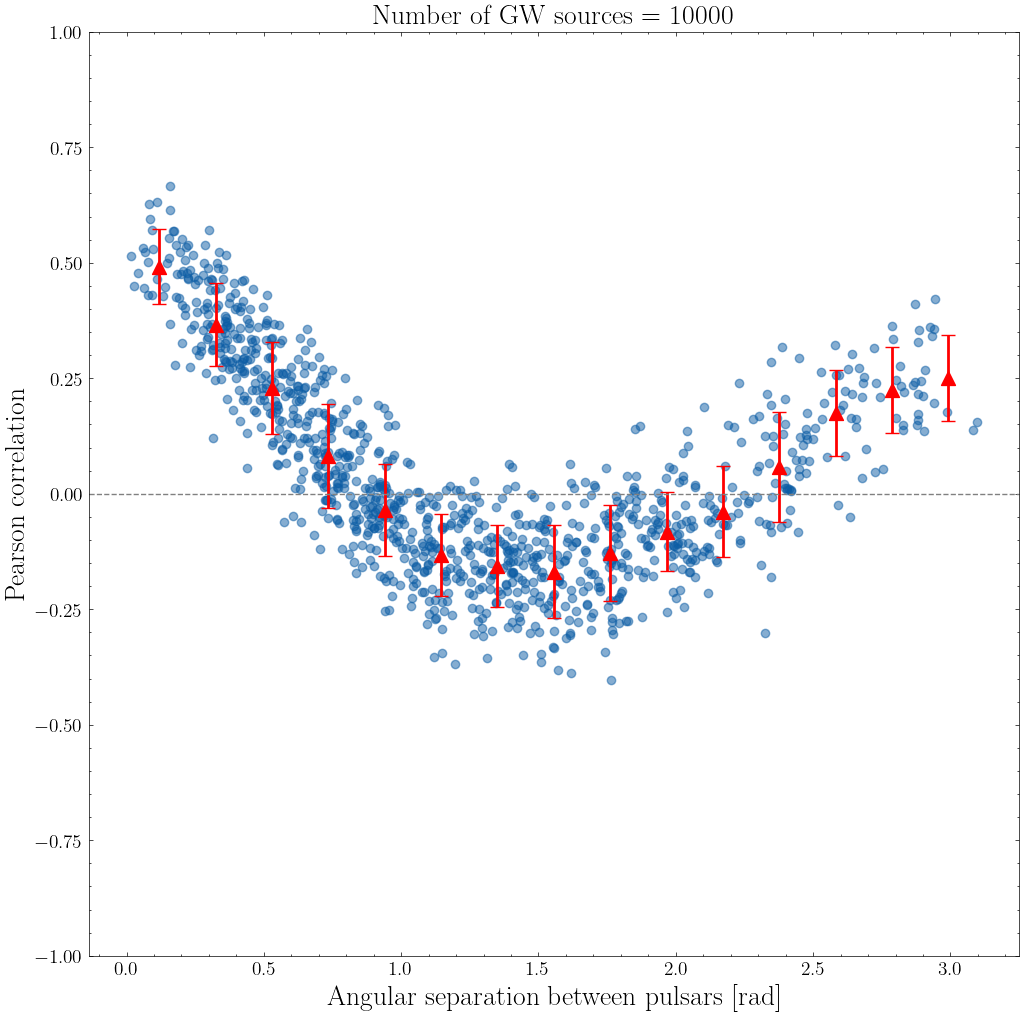

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 25118 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


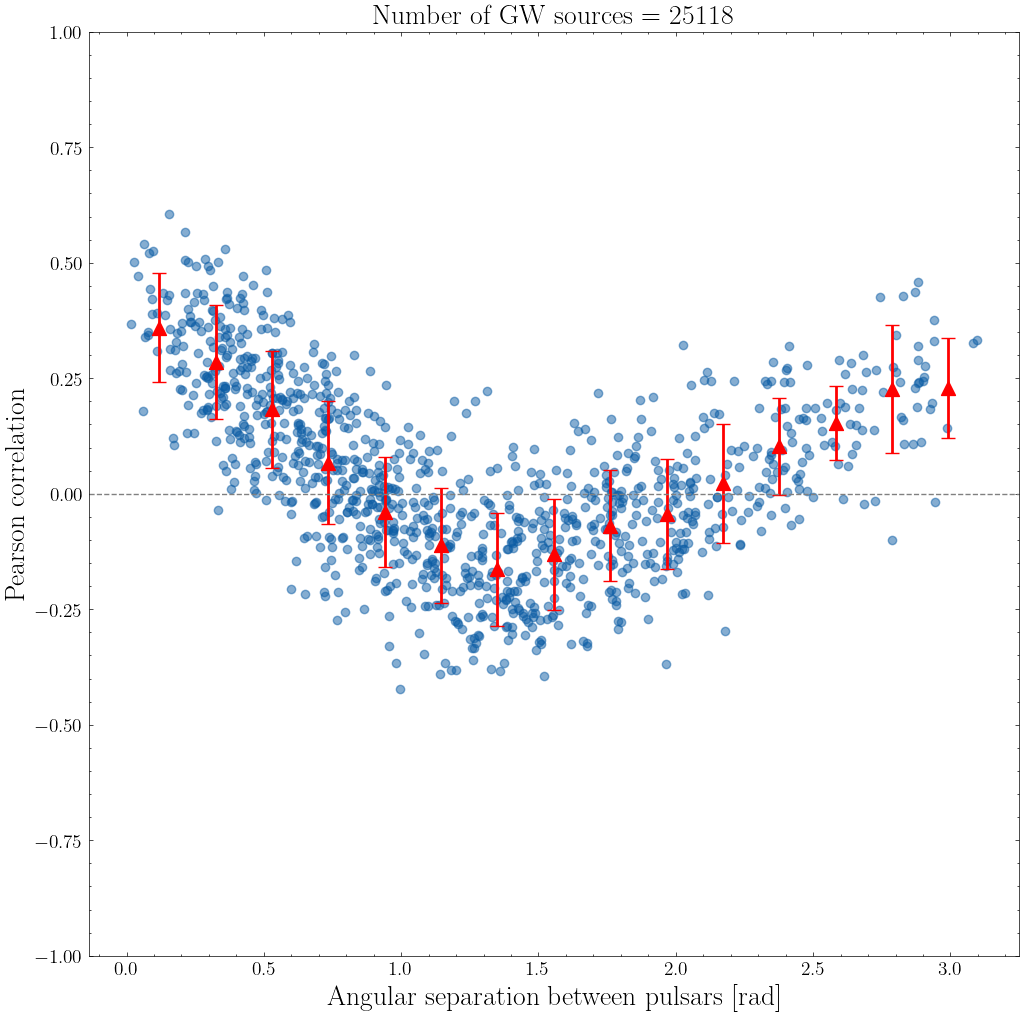

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1238
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling


Running with 63095 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation


Calculating the X factor
Getting the correlations between  1081  pairs


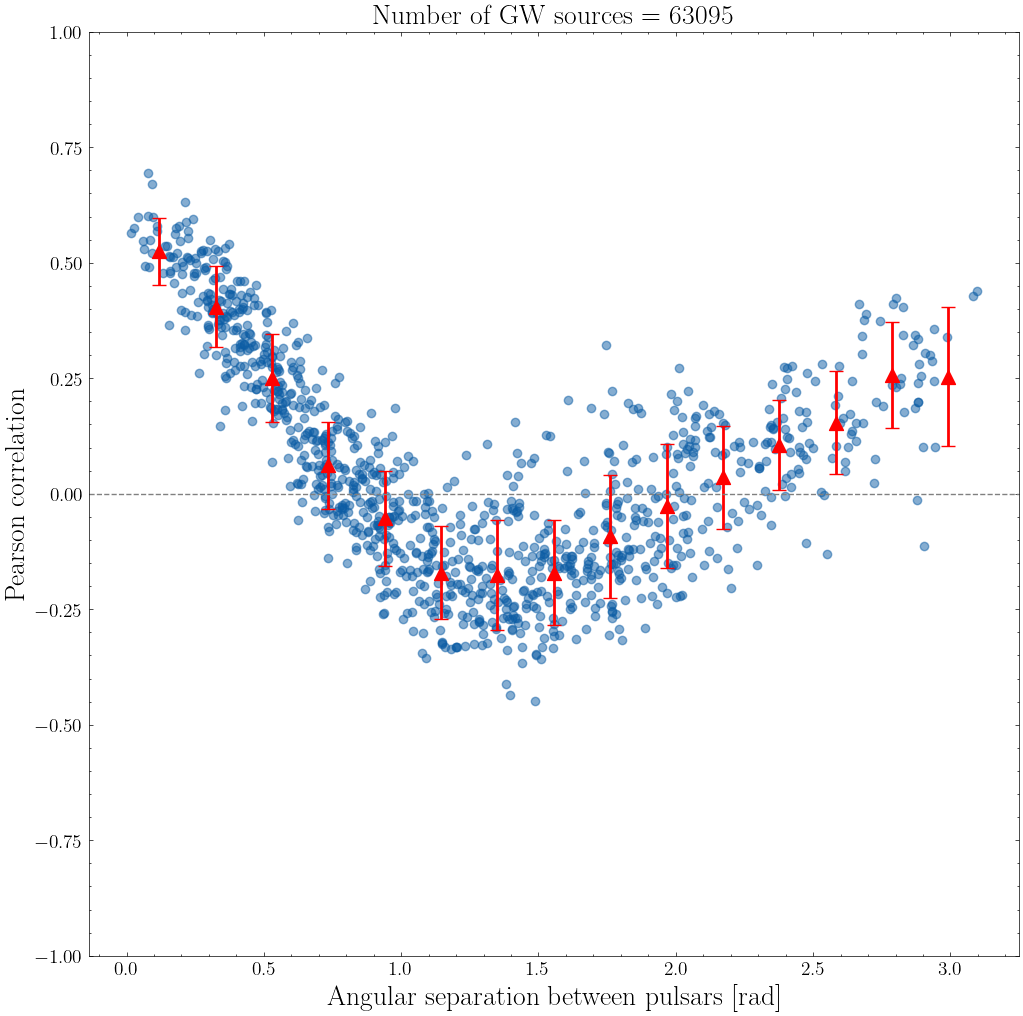

In [112]:
for k_exponent in np.arange(0,5,0.4):
    k = int(10**k_exponent)
    x,y = pipeline(k,1238)
    figure = add_to_plot(x,y,k,savefig=True)

In [ ]:
#Animate it
#ffmpeg -framerate 1 -pattern_type glob -i '*.png' -s:v 1920x1080 -c:v libx264 -pix_fmt yuv420p out.mp4
#run the above in the folder where .png are stored

In [115]:
from IPython.display import Video
Video("../data/images/HD/out.mp4")